In [29]:
from __future__ import print_function

In [30]:
import numpy as np
import sys

In [31]:
import nsfg
import first
import thinkstats2
import thinkplot

In [32]:
def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean

In [33]:
def PmfVar(pmf, mu=None):
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

In [34]:
def Diffs(t):
    first = t[0]
    rest = t[1:]
    diffs = [first - x for x in rest]
    return diffs

In [39]:
def PairWiseDifferences(live):
    live = live[live.prglngth >= 37]
    preg_map = nsfg.MakePregMap(live)

    diffs = []
    for caseid, indices in preg_map.items():
        lengths = live.loc[indices].prglngth.values
        if len(lengths) >= 2:
            diffs.extend(Diffs(lengths))

    mean = thinkstats2.Mean(diffs)
    print('Mean difference between pairs', mean)

    pmf = thinkstats2.Pmf(diffs)
    thinkplot.Hist(pmf, align='center')
    thinkplot.Show(xlabel='Difference in weeks',
                   ylabel='PMF')

In [40]:
def main(script):
    live, firsts, others = first.MakeFrames()
    PairWiseDifferences(live)

    prglngth = live.prglngth
    pmf = thinkstats2.Pmf(prglngth)
    mean = PmfMean(pmf)
    var = PmfVar(pmf)

    assert(mean == pmf.Mean())
    assert(var == pmf.Var())
    print('mean/var preg length', mean, var)

    print('%s: All tests passed.' % script)


Mean difference between pairs 0.18850574712643678


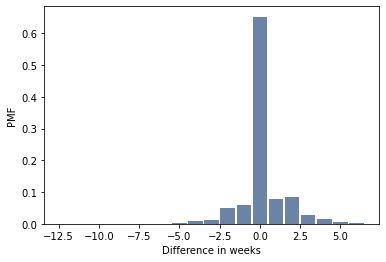

mean/var preg length 38.56055968517709 7.301863788195439
['C:\\Users\\bland\\anaconda3\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\bland\\AppData\\Roaming\\jupyter\\runtime\\kernel-39e08579-bce9-4be8-9122-29bdcf5d141b.json']: All tests passed.


<Figure size 576x432 with 0 Axes>

In [41]:
if __name__ == '__main__':
    main(sys.argv)
